In [174]:
%matplotlib inline

# pip install pynmea2
import pynmea2
import random
import numpy as np
import pandas as pd
import seaborn as sns
import string
import matplotlib.pyplot as plt

In [178]:
datadict = {'Latitude' : [], 'Longitude' : [], 'Frequency' : []}

f = open('cvc.txt', 'r')
l = f.readline()
while l != "":
    lat, lon = l.split(",")
    if (lat in datadict['Latitude']) and (lon in datadict['Longitude']) and datadict['Latitude'].index(lat) == datadict['Longitude'].index(lon):
        datadict['Frequency'][datadict['Latitude'].index(lat)] += 1
    else:
        datadict['Latitude'].append(lat)
        datadict['Longitude'].append(lon)
        datadict['Frequency'].append(1)
    l = f.readline()
    
dataframe = pd.DataFrame(datadict)
df = dataframe.pivot_table(index = 'Latitude', columns = 'Longitude', values = 'Frequency')
sns.heatmap(df, vmin = -180, vmax = 180)

ValueError: not enough values to unpack (expected 2, got 1)

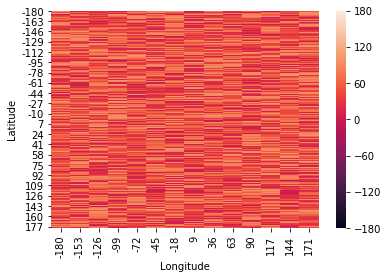

In [169]:
datadict = {'Latitude' : [], 'Longitude' : [], 'Frequency' : []}
for i in range(-180, 180):
    for j in range(-180, 181, 27):
        datadict['Latitude'].append(i)
        datadict['Longitude'].append(j)
        datadict['Frequency'].append(random.randint(1,100))
    
dataframe = pd.DataFrame(datadict)
df = dataframe.pivot_table(index = 'Latitude', columns = 'Longitude', values = 'Frequency')
sns.heatmap(df, vmin = -180, vmax = 180)

In [168]:
minlat = min(dataframe['Latitude'])
minlon = min(dataframe['Longitude'])
maxlat = max(dataframe['Latitude'])
maxlon = max(dataframe['Longitude'])

plt.pcolor(dataframe)
plt.yticks(np.arange(0.5, len(dataframe.index), 1), dataframe.index)
plt.xticks(np.arange(0.5, len(dataframe.columns), 1), dataframe.columns)
plt.show()

dataframe.plot(x = 'Latitude', y = 'Longitude', kind = 'scatter', 
               xlim = (minlat - (minlat/30000), maxlat + (maxlat/30000)),
               ylim = (minlon - (minlon/30000), maxlon + ( maxlon/30000)))

ValueError: min() arg is an empty sequence

In [18]:
# # locations = gmaps.datasets.load_dataset("starbucks_uk")

# fig = gmaps.Map()
# # starbucks_layer = gmaps.symbol_layer(
# #     locations, fill_color="green", stroke_color="green", scale=2)
# # fig.add_layer(starbucks_layer)
# fig